## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.
Resources:
- Groud truth notebook - https://github.com/mrdbourke/pytorch-deep-learning
- Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/


In [111]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [112]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt # visualize, visualize, visualize

# check PyTorch version
torch.__version__

'2.5.1'

### 1. Data (preparing and Loading)

Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data....)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *Known* data using Linear Regression formula.

We'll use a linear regression formula to make a straight line with *Known* **parameters**.

In [113]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [114]:
len(X), len(y)

(50, 50)

#### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [115]:
# Create a train/test split 
train_split = int(0.8 * len(X)) 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data? 

This is where the data explorer's motto comes in!

'Visualize, Visualize, Visualize'

In [461]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compared predictions.
    """
    plt.figure(figsize=(10, 6))

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c='b', s=6, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=6, label='Testing data')

    # Are there any predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=6, label='Predictions')

    # Show the legend
    plt.legend(prop={'size': 14});
    

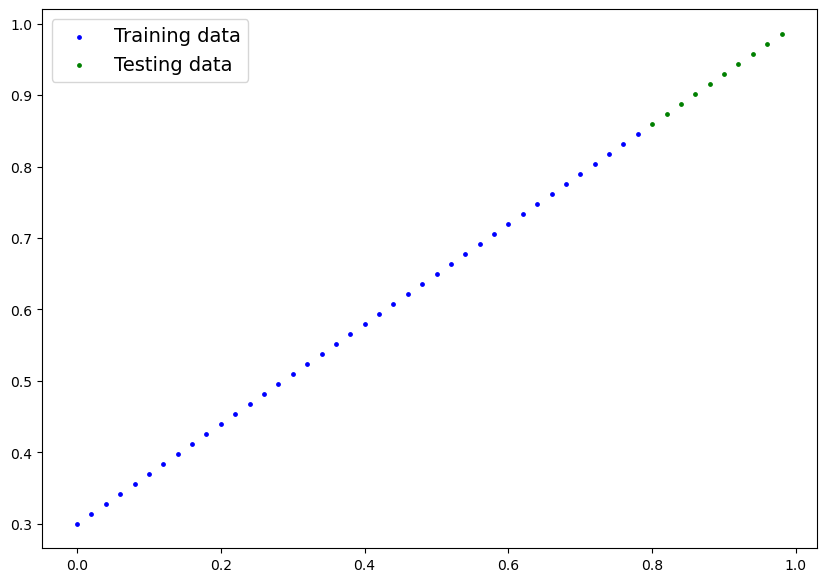

In [117]:
plot_predictions()

### 2. Build model

Our first PyTorch model!

This is very exciting...let's do it!

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropogation

In [118]:
# Create linear regression model class 
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module ->
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, # can this parameter to updated via gradient descent
                                                dtype=torch.float) # Pytorch loves the data type torch.float32
                                   )
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
        return self.weights * x + self.bias # Linear regression formula

#### PyTorch model Building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered as computation graph)
* torch.nn.Parameters - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural nets modules, if you subclass it , you should override the forward method.
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to override forward(), this method defines what happens in the forward computation.
                                                                                                                          

#### Checking the contents of our PyTorch model 

Now we've created a model, let's see what's inside...

So we can check our model params or what's inside our model using `.parameters()`.

In [444]:
# Create a random seed - for reproducibility
torch.manual_seed(42)

# Create an instance of the model (this is a subcclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [445]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making prediction using `torch.inference_mode()`

To check out model's predictive power, let's see how well in predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method

In [446]:
# Make predictions with model 
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however inference_mode is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds[:2], y_test[:2] # Way far from each other.

(tensor([[0.3982],
         [0.4049]]),
 tensor([[0.8600],
         [0.8740]]))

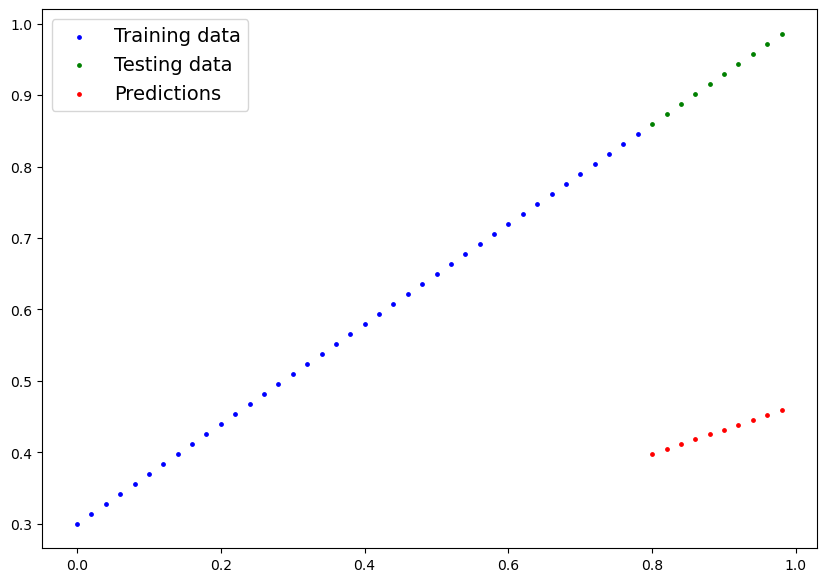

In [447]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to **Known** parameters.

Or in other words from a poor representation to the data to a better representation of the data.

One way to measure how poor or how wrong your model's prediction are is to use `loss functions`

* Note: loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, the lower is the better.

* **Optimizer:** Takes into account the loss of a model and adjust the models parameters (e.g. weight and bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [448]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [449]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [450]:
from torch.optim.lr_scheduler import StepLR

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) # lr = learning rate is possibly the most important hyperparameter you can set


# Create scheduler: reduce LR by gamma=0.1 every step_size=50 epochs
scheduler = StepLR(optimizer, step_size=170, gamma=0.1)


Q. Which loss function and optimizer should i use?

A. This will be Problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

#### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward` function(s)) to make predictions on data - also called forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**Gradient Descent**)

In [451]:
from tqdm.auto import tqdm

In [452]:
# Store losses for plotting
epoch_counts = []
train_losses = []
test_losses = []

In [453]:
# Reproducibility
torch.manual_seed(42)

# Number of epochs (a loop through the full dataset)
epochs = 200

### Training
# 0. Loop through the data 
for epoch in tqdm(range(epochs), desc="Training Progress"):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass 
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())
    epoch_counts.append(epoch+1)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss wrt parameters of the model
    loss.backward()

    # 5. Step by optimizer - perform gradient descent
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration in the loop.

    # Learning rate scheduler
    scheduler.step()

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batchnorm).

    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes not needed
        # 1. Do the forward pass in testing mode 
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        test_losses.append(test_loss.item())
    
    # print out what's happening
    if epoch % 10 == 0:
        print(f"\nEpoch: {epoch} | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f} | LR: {optimizer.param_groups[0]['lr']:.5f}")
        # Print out model state_dict()
        print(f"weight: {model_0.state_dict()['weights']} | bias: {model_0.state_dict()['bias']}")


Training Progress:   0%|          | 0/200 [00:00<?, ?it/s]


Epoch: 0 | Loss: 0.3129 | Test Loss: 0.4811 | LR: 0.01000
weight: tensor([0.3406]) | bias: tensor([0.1388])

Epoch: 10 | Loss: 0.1977 | Test Loss: 0.3464 | LR: 0.01000
weight: tensor([0.3796]) | bias: tensor([0.2388])

Epoch: 20 | Loss: 0.0891 | Test Loss: 0.2173 | LR: 0.01000
weight: tensor([0.4184]) | bias: tensor([0.3333])

Epoch: 30 | Loss: 0.0531 | Test Loss: 0.1446 | LR: 0.01000
weight: tensor([0.4512]) | bias: tensor([0.3768])

Epoch: 40 | Loss: 0.0454 | Test Loss: 0.1136 | LR: 0.01000
weight: tensor([0.4748]) | bias: tensor([0.3868])

Epoch: 50 | Loss: 0.0417 | Test Loss: 0.0992 | LR: 0.01000
weight: tensor([0.4938]) | bias: tensor([0.3843])

Epoch: 60 | Loss: 0.0382 | Test Loss: 0.0889 | LR: 0.01000
weight: tensor([0.5116]) | bias: tensor([0.3788])

Epoch: 70 | Loss: 0.0348 | Test Loss: 0.0806 | LR: 0.01000
weight: tensor([0.5288]) | bias: tensor([0.3718])

Epoch: 80 | Loss: 0.0313 | Test Loss: 0.0723 | LR: 0.01000
weight: tensor([0.5459]) | bias: tensor([0.3648])

Epoch: 90 

In [454]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [455]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6991])), ('bias', tensor([0.2995]))])

In [456]:
weight, bias

(0.7, 0.3)

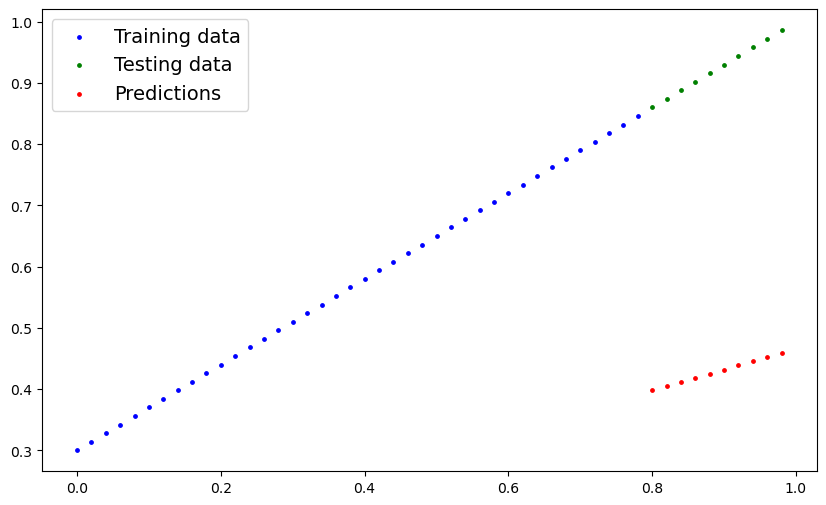

In [462]:
# previous predictions
plot_predictions(predictions=y_preds)

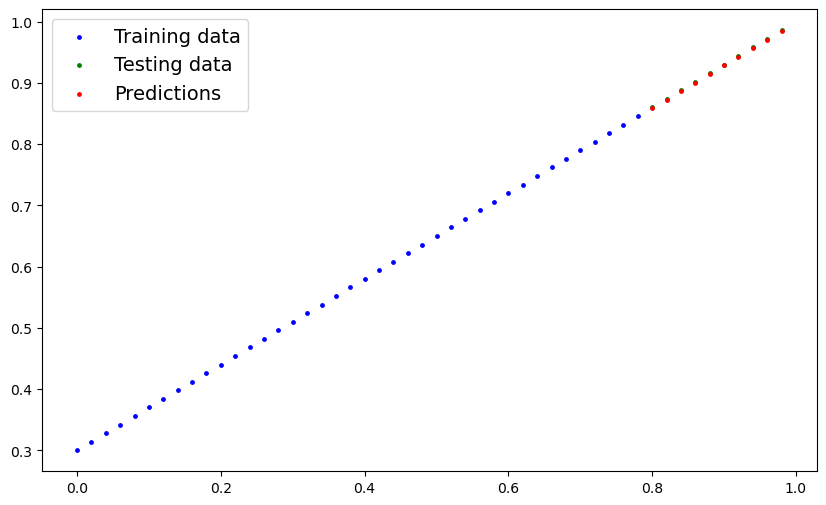

In [463]:
# Current prediction after few epochs
plot_predictions(predictions=y_preds_new)

**Wow we are soo closer to the real truth**

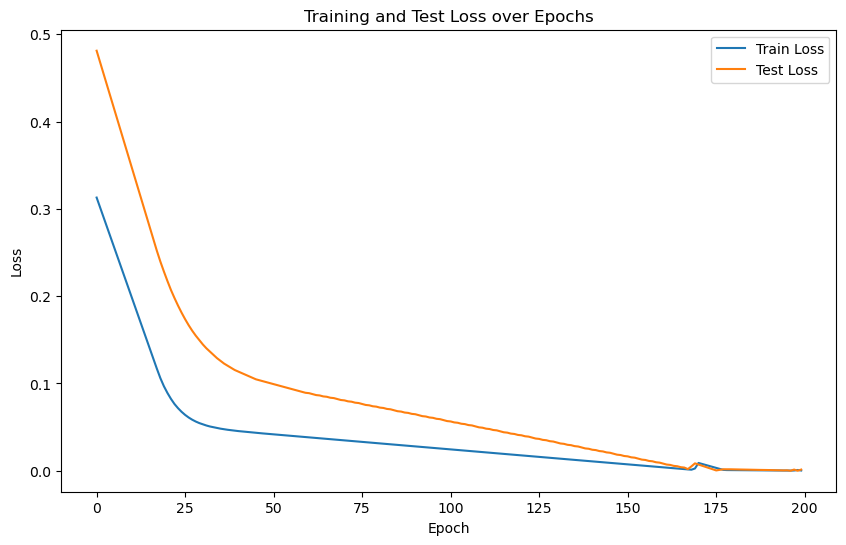

In [460]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.show()


### 4. Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in torch.

1. `torch.save()` - allows you to save a PyTorch object in python's pickle format
2. `torch.load()` - allows you to load the saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

In [464]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6991])), ('bias', tensor([0.2995]))])

In [467]:
# Saving our PyTorch model
from pathlib import Path 

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = '01_pytorch_workflow_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_0.pth


In [465]:
model_0

LinearRegressionModel()

### 5. Loading a PyTorch Model

Since we saved our model's `state_dict()` rather than entire model, we'll create new instance of our model class and load the saved `state_dict` into that.

In [469]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6991])), ('bias', tensor([0.2995]))])

In [472]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

C:\Users\yashs\AppData\Local\Temp\ipykernel_17172\1170343677.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

<All keys matched successfully>

In [471]:
# Without loading
#loaded_model_0.state_dict()
#OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [473]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6991])), ('bias', tensor([0.2995]))])

In [475]:
# Make some predictions with our loaded model 
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8588],
        [0.8727],
        [0.8867],
        [0.9007],
        [0.9147],
        [0.9287],
        [0.9426],
        [0.9566],
        [0.9706],
        [0.9846]])

In [478]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [479]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt 


Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

if no GPU is available, the code will default to using CPU.

In [480]:
# Setup device agnoistic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


#### 6.1 Data

In [481]:
# Create some data using the linear regression formula of y = weight * feature + bias
weight = 0.7
bias = 0.3

# Create range values 
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [482]:
 # Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

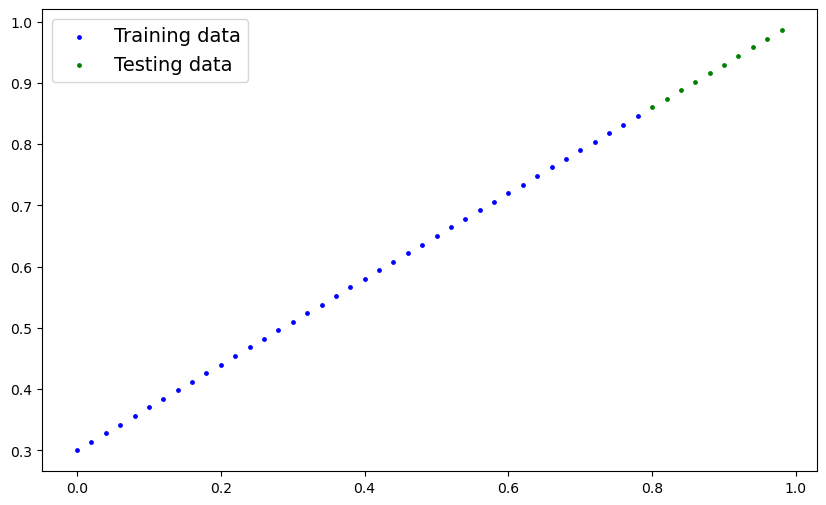

In [483]:
# Plot the data 
plot_predictions()

#### 6.2 Building a PyTorch Linear Model

In [488]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# set the manual seed 
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [489]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [491]:
# See the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

#### 6.3 Training

For Training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop


In [501]:
# Setup loss function 
loss_fn = nn.L1Loss()

# Setpu optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [502]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation
    loss.backward()

    # 5. Optimezer step to perform gradient descent
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # Forward pass on test set 
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.010256479494273663 | Test loss: 0.012454724870622158
Epoch: 10 | Loss: 0.0006695442134514451 | Test loss: 0.0014927327865734696
Epoch: 20 | Loss: 0.0003230251313652843 | Test loss: 0.0006653607124462724
Epoch: 30 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 40 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 50 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 60 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 70 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 80 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 90 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 100 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 110 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 120 | Loss: 0.0005198359722271562 | Test loss: 0.00040595533209852874
Epoch: 130 | Lo

In [503]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2998], device='cuda:0'))])

In [504]:
weight, bias

(0.7, 0.3)

#### 6.4 Making and evaluating predictions

In [505]:
# Turn the model into eval mode
model_1.eval()

# Make predictions on the test data 
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8591],
        [0.8731],
        [0.8871],
        [0.9011],
        [0.9151],
        [0.9291],
        [0.9430],
        [0.9570],
        [0.9710],
        [0.9850]], device='cuda:0')

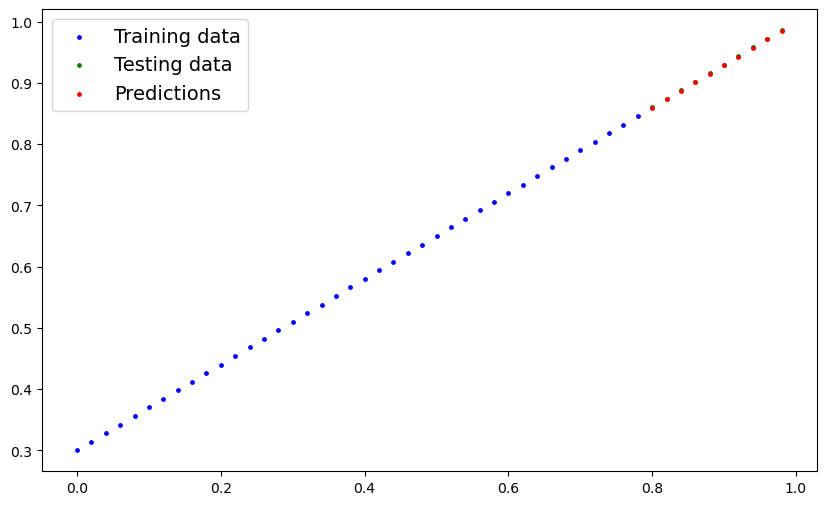

In [506]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu().numpy())

#### 6.5 Saving and Loading a trained model

In [511]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_model_1.pth


In [513]:
# Load a Pytorch
loaded_model_1 = LinearRegressionModelV2()


# Load the saved model_1 state_dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

C:\Users\yashs\AppData\Local\Temp\ipykernel_17172\2461640510.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [514]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [515]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2998], device='cuda:0'))])

In [517]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')